<a href="https://colab.research.google.com/github/gdisarra/topology-degree/blob/main/topology_degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computation of $\Gamma_d$
This notebook shows the computation of the degree of topology $\Gamma$ with some guided examples on synthetic data from know topologies.\
In particular, following the framework in *di Sarra et al., 2025* https://doi.org/10.1371/journal.pcbi.1012776, $\Gamma_d$ is computed as
\begin{equation}
\Gamma_d = 1-d_B\left(\frac{\tau_d}{u(\tau_d)}, \frac{\tau_d^{ref}}{u(\tau_d^{ref})}\right),
\end{equation}
where $d_B$ is the bottleneck distance, $\tau_d$ is a set of bars in dimension d, $\tau_d^{ref}$ is a set of bars taken as a reference in dimension d, and $u(\tau_d)$ is the bar normalization
\begin{equation}
u(\tau_d) = \max_{p,p'\in P} || p-p'||_{\infty}
\end{equation}
where $p$ and $p'$ are bars (hole lifetimes) belonging to the barcode $P$. For the unperturbed cases, the reference barcode is the closest idealized barcode to the sample barcode itself, for a given topology. This will give the quantification $\Gamma^{self}_1$.

Each topological structure is identified by their Betti numbers. In this case
* $(1,1,0)$ for a circle
* $(1,0,1)$ for a sphere
* $(1,2,1)$ for a torus

In the following examples, synthetic datasets are generated from defined topologies (circle, sphere or torus in 3D). From each dataset, persistent homology computes the barcode and the degree of circular, spherical and toroidal topologies is subsequently computed as explained previously. The default code only computes $\Gamma^{self}_d$ for $d=1$.

This notebook also has a tutorial to compute $\Gamma^{self}_d$ on users' data, both for high-dimensional vectors and already generated barcodes. The user can store datasets as `'your_data.npy'` and barcodes as `'your_barcode.npy'` in the current directory and run the relative cells to compute $\Gamma^{self}_d$.

The deviations from the hand-defined shape are traced with $\Gamma_d$ by perturbing the coordinates of the data points with Gaussian noise $N(0,\delta)$. In the case of $\Gamma_d$, the reference is chosen as the closest idealized barcode to the noiseless barcode, for a given topology. The same is done for toroidal topology (Betti numbers (1,2,1)) in Fig. 2 in *di Sarra et al., 2025* https://doi.org/10.1371/journal.pcbi.1012776.

### Clone repository and install requirements
`gamma_utils.py` in the repository contains classes (`Synthetic_Data` and `Barcode`) definitions and functions.

In [1]:
!rm -rf topology-degree

In [2]:
!git clone https://github.com/gdisarra/topology-degree.git
%cd topology-degree
!pip install persim
!pip install ripser

Cloning into 'topology-degree'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 5.01 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/topology-degree


### Parameters definition and import dependencies
random seed, topology of the data, maximal homological dimension, parameters of the shape (`r` and `R`), number of data points and level of noise.

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from gamma_utils import *
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

seed=int(time.time())
#seed = 2
np.random.seed(int(seed))
print("random seed", seed)

maxdim = 1
betti_ns = ['110','101','121'] #for circle, sphere and torus
ref = {'110':[], '101':[], '121':[]}

random seed 1749028904


In [4]:
r = 1

R = 2

num_points = 1100

noise = 0.

dim = 3

Gamma = []
Gamma_self = []

shape = input('What is the topology of the dataset? Enter for torus, or type circle, sphere\n')
if shape=='':
    shape='torus'

What is the topology of the dataset? Enter for torus, or type circle, sphere



## $\Gamma_1$ computation for a given topological structure
To compute $\Gamma_1$, we divide the pipeline into 3 steps:
* Synthetic generation of a geometrical shape (circle, sphere or torus) in 3D.
* Barcode from Persistent Homology
* Computation of $\Gamma_1$ from the barcode

### Synthetic generation of a geometrical shape (circle, sphere or torus) in 3D.

`R` and `r` are the two radii of the torus, (`r` for the circle and sphere only radius). The data on the shape can be perturbed by a random zero-mean Gaussian noise and standard deviation `noise`.

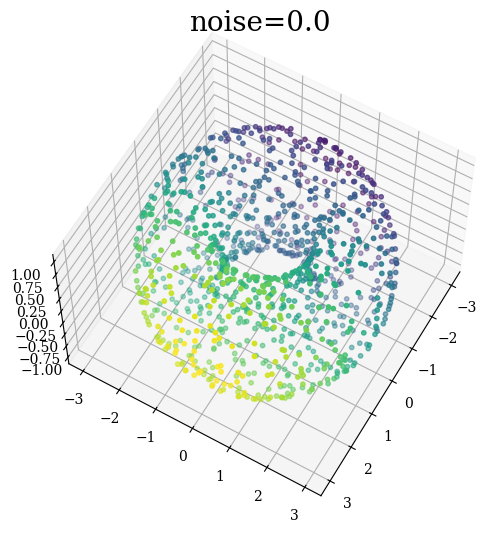

In [5]:
data_generator = Synthetic_Data(shape, dim, num_points)
dataset = data_generator.generate_dataset( r, R, noise, if_plot=True)

np.save('your_data.npy', dataset)

### Barcode from Persistent Homology
A barcode object is initialized and computed from the generated dataset by running Persistent Homology.

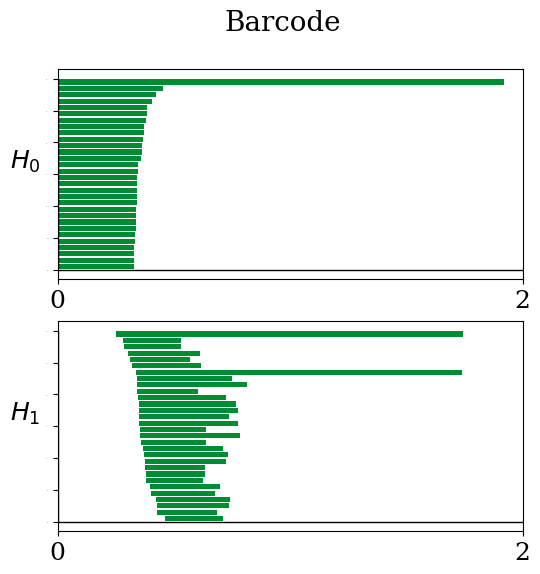

In [6]:
barcode = Barcode()
barcode.compute_barcode(dataset, maxdim, if_plot=True)

In [7]:
np.save('your_barcode.npy', np.array(barcode.barcode, dtype=object), allow_pickle=True)

### Computation of $\Gamma_1$ from the barcode
$\Gamma_1$ is computed from a barcode. For each topological structure, the reference is built with Betti numbers `betti_n` from the barcode itself with the argument `'self'`.

In [8]:
for bn in betti_ns:
    G_self = barcode.compute_Gamma(ref='self', betti_n=bn)
    display(Markdown(r'Degree of '+bn+': $\Gamma_1^{self} ='+str(np.round(G_self, decimals=3))+r'$'))

Degree of 110: $\Gamma_1^{self} =0.061$

Degree of 101: $\Gamma_1^{self} =0.061$

Degree of 121: $\Gamma_1^{self} =0.683$

The same procedure can be performed also for $H_2$ by setting `maxdim = 2`

## Customize for user data

### Default parameters
To use this measure on your data, you can run the following box, where `your_data.npy` is stored as an N-dimensional array of coordinates, provided by the user. This will perform persistent homology with `ripser` default parameters. $\Gamma_1$ can be computed from the `barcode` object, from many different topologies.

Degree of 110: $\Gamma_1^{self} =0.061$

Degree of 101: $\Gamma_1^{self} =0.061$

Degree of 121: $\Gamma_1^{self} =0.683$

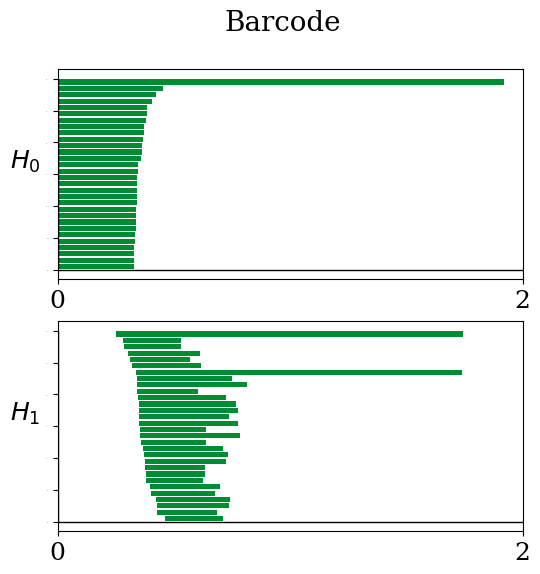

In [9]:
dataset = np.load('your_data.npy')

barcode = Barcode()
barcode.compute_barcode(dataset, maxdim, if_plot=True)

for bn in betti_ns:
    G_self = barcode.compute_Gamma(ref='self', betti_n=bn)
    display(Markdown(r'Degree of '+bn+': $\Gamma_1^{self} ='+str(np.round(G_self, decimals=3))+r'$'))

### $\Gamma_d$ on user-provided barcodes
You can also use this measure on your data when you have your own customized TDA pipeline computing the barcode. It is enough to define the barcode object from your own barcode and use the function `compute_Gamma`. The barcode is stored as a $d$-dimensional list of arrays containing birth and death of each hole in dimension $d$.

Degree of 110: $\Gamma_1^{self} =0.061$

Degree of 101: $\Gamma_1^{self} =0.061$

Degree of 121: $\Gamma_1^{self} =0.683$

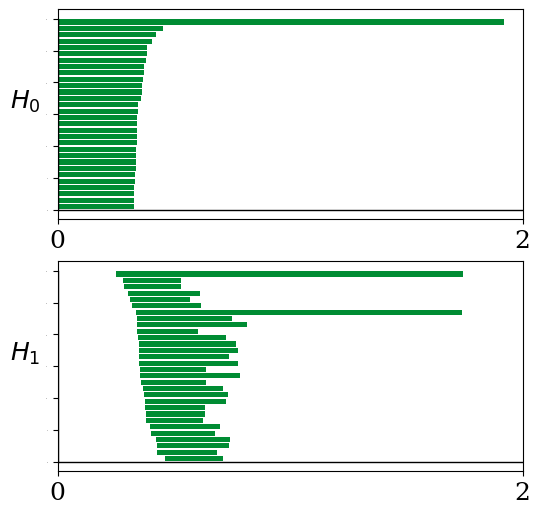

In [10]:
barcode = Barcode()
barcode.barcode = np.load('your_barcode.npy', allow_pickle = True).tolist()
barcode.plot()

for bn in betti_ns:
    G_self = barcode.compute_Gamma(ref='self', betti_n=bn)
    display(Markdown(r'Degree of '+bn+': $\Gamma_1^{self} ='+str(np.round(G_self, decimals=3))+r'$'))

## Gamma computation for different levels of noise and various topologies in 3D
$\Gamma_1$ and $\Gamma_1^{self}$ are computed as a function of the level of noise for syntetic topological datasets.

In [11]:
top_data = input('What is the topology of the dataset? Enter for torus, or type circle, sphere\n')
if top_data=='':
    top_data='torus'

dim = 3

r = 5

R = 10

num_points = 1100

noises = np.arange(0., 2.5, 0.1)

Gamma = {'110':[], '101':[], '121':[]}
Gamma_self = {'110':[], '101':[], '121':[]}

What is the topology of the dataset? Enter for torus, or type circle, sphere



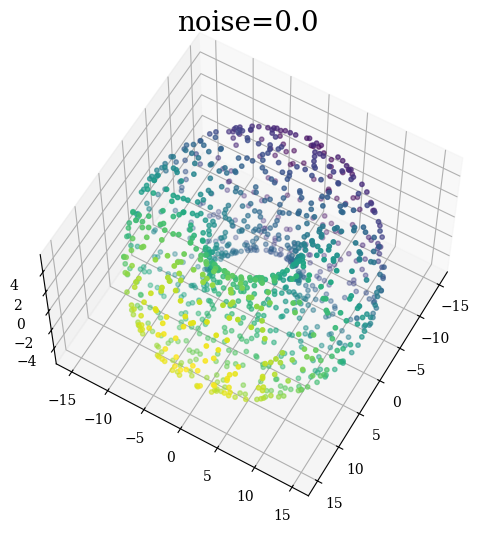

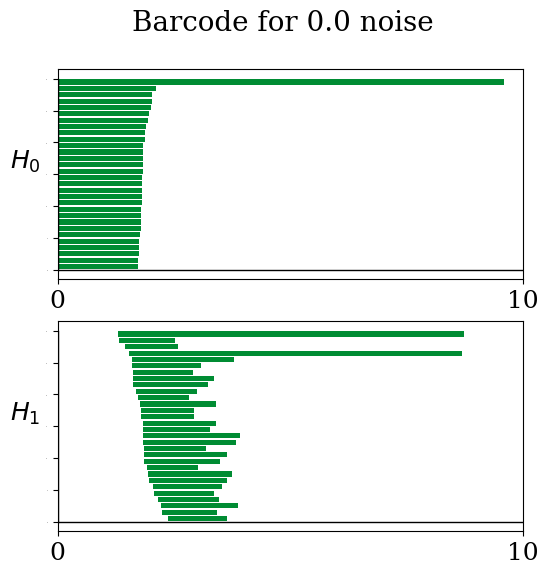

Degree of 110: $\Gamma_1 =0.038$ and $\Gamma_1^{self} =0.038$

Degree of 101: $\Gamma_1 =0.038$ and $\Gamma_1^{self} =0.038$

Degree of 121: $\Gamma_1 =0.706$ and $\Gamma_1^{self} =0.706$

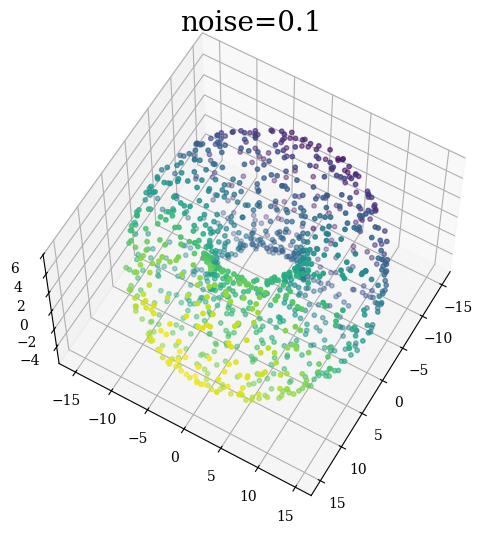

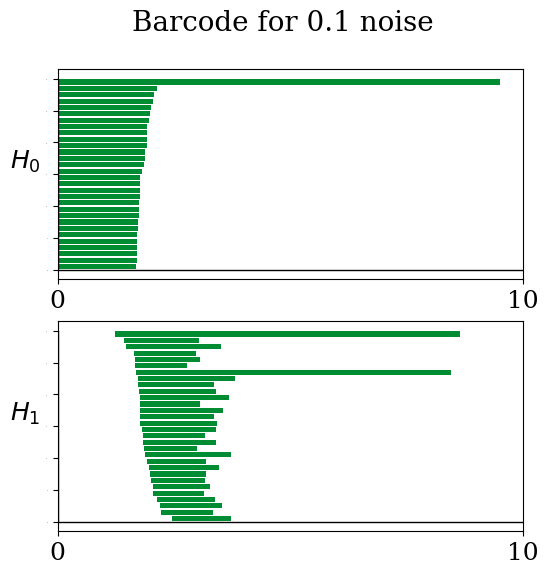

Degree of 110: $\Gamma_1 =0.085$ and $\Gamma_1^{self} =0.085$

Degree of 101: $\Gamma_1 =0.085$ and $\Gamma_1^{self} =0.085$

Degree of 121: $\Gamma_1 =0.717$ and $\Gamma_1^{self} =0.717$

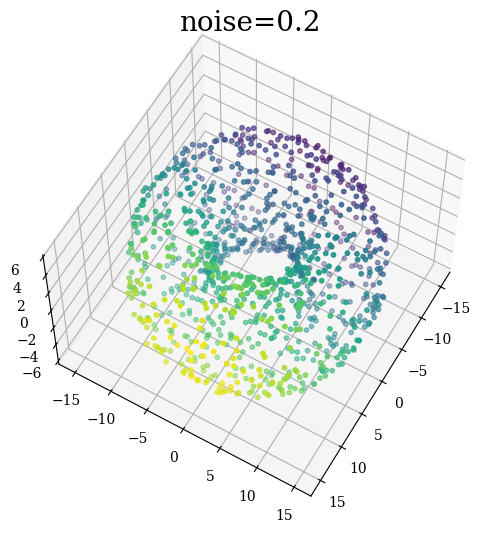

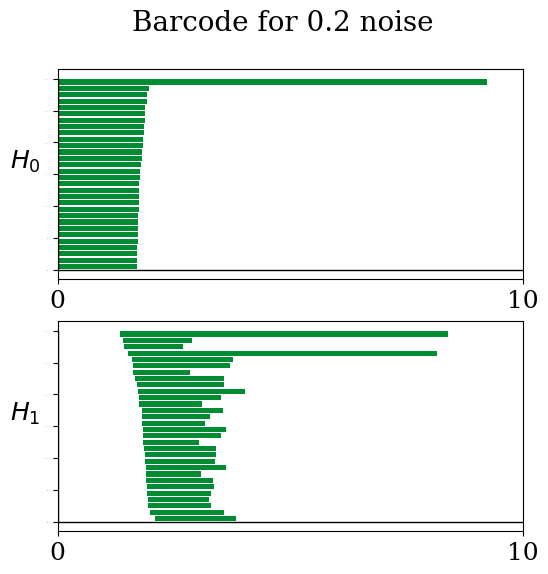

Degree of 110: $\Gamma_1 =0.057$ and $\Gamma_1^{self} =0.057$

Degree of 101: $\Gamma_1 =0.057$ and $\Gamma_1^{self} =0.057$

Degree of 121: $\Gamma_1 =0.674$ and $\Gamma_1^{self} =0.674$

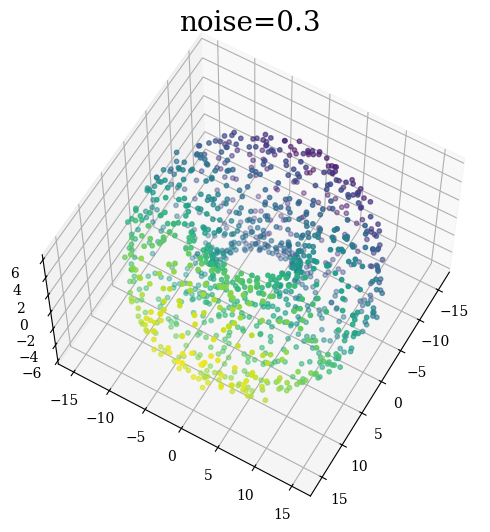

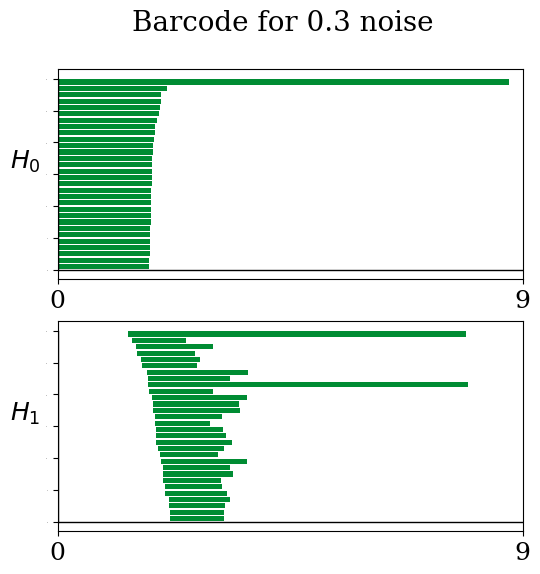

Degree of 110: $\Gamma_1 =0.052$ and $\Gamma_1^{self} =0.052$

Degree of 101: $\Gamma_1 =0.052$ and $\Gamma_1^{self} =0.052$

Degree of 121: $\Gamma_1 =0.703$ and $\Gamma_1^{self} =0.703$

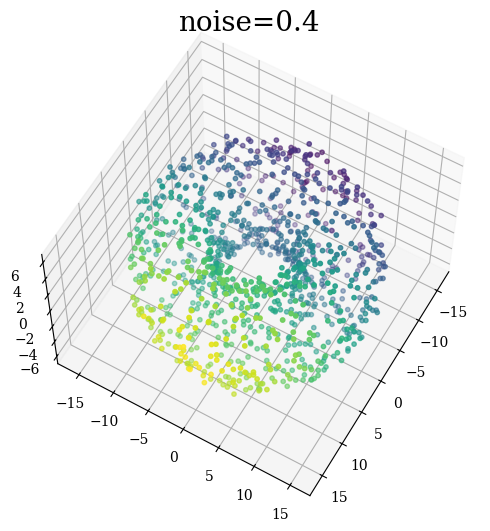

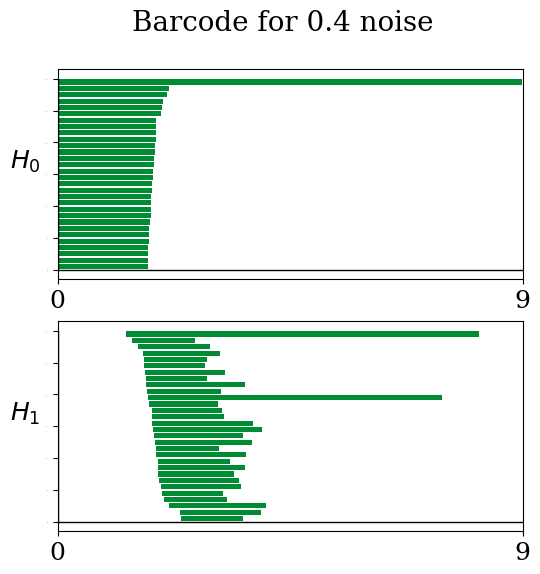

Degree of 110: $\Gamma_1 =0.166$ and $\Gamma_1^{self} =0.166$

Degree of 101: $\Gamma_1 =0.166$ and $\Gamma_1^{self} =0.236$

Degree of 121: $\Gamma_1 =0.693$ and $\Gamma_1^{self} =0.693$

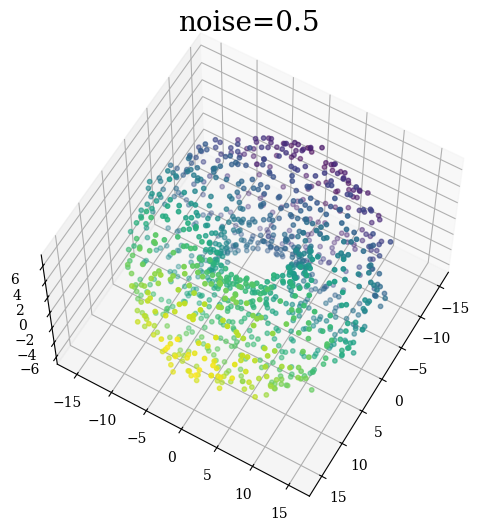

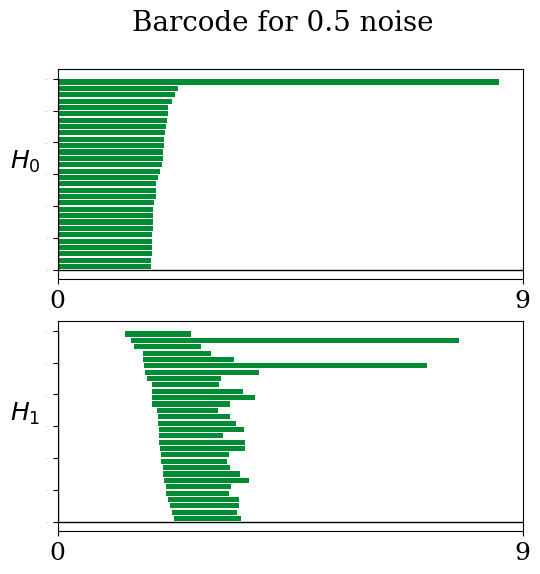

Degree of 110: $\Gamma_1 =0.137$ and $\Gamma_1^{self} =0.137$

Degree of 101: $\Gamma_1 =0.137$ and $\Gamma_1^{self} =0.172$

Degree of 121: $\Gamma_1 =0.652$ and $\Gamma_1^{self} =0.652$

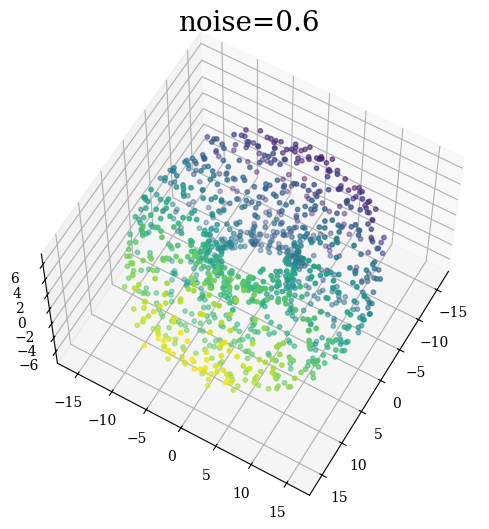

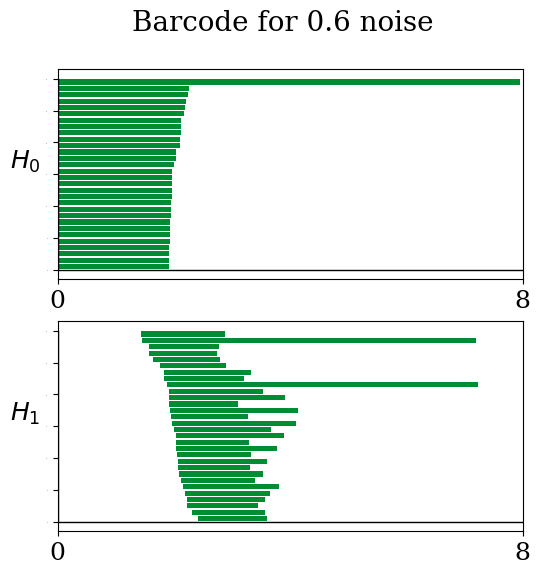

Degree of 110: $\Gamma_1 =0.066$ and $\Gamma_1^{self} =0.066$

Degree of 101: $\Gamma_1 =0.066$ and $\Gamma_1^{self} =0.066$

Degree of 121: $\Gamma_1 =0.618$ and $\Gamma_1^{self} =0.618$

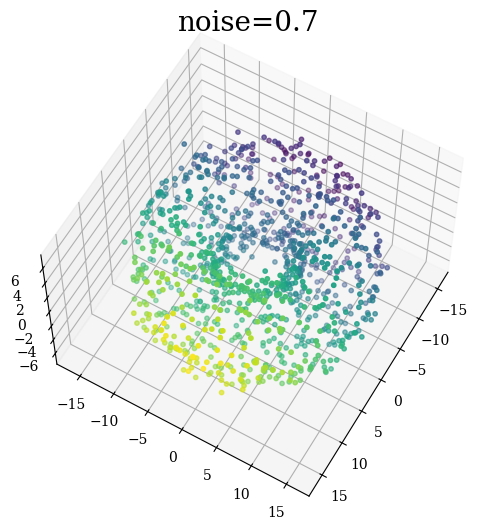

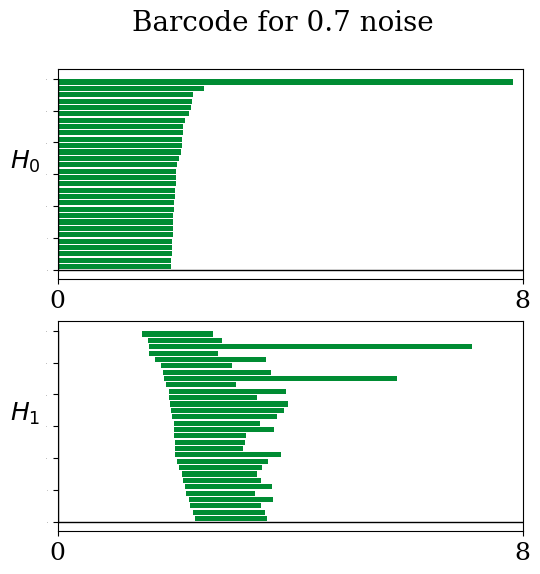

Degree of 110: $\Gamma_1 =0.278$ and $\Gamma_1^{self} =0.278$

Degree of 101: $\Gamma_1 =0.278$ and $\Gamma_1^{self} =0.499$

Degree of 121: $\Gamma_1 =0.635$ and $\Gamma_1^{self} =0.537$

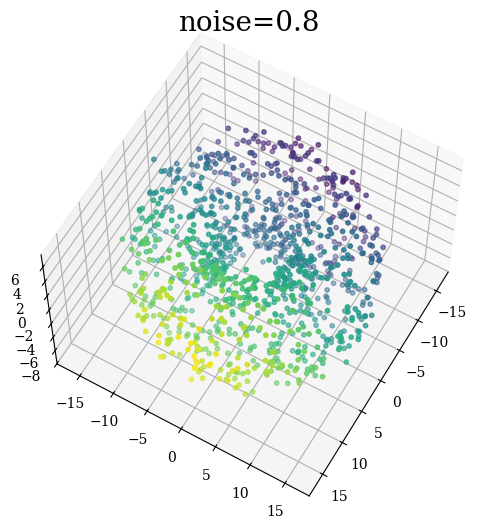

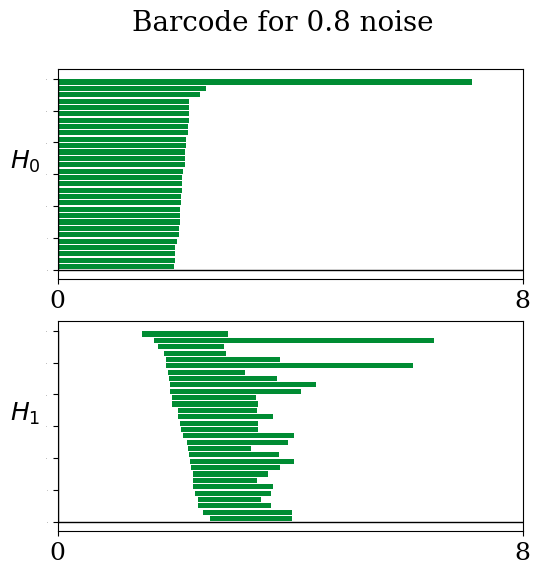

Degree of 110: $\Gamma_1 =0.122$ and $\Gamma_1^{self} =0.122$

Degree of 101: $\Gamma_1 =0.122$ and $\Gamma_1^{self} =0.568$

Degree of 121: $\Gamma_1 =0.478$ and $\Gamma_1^{self} =0.478$

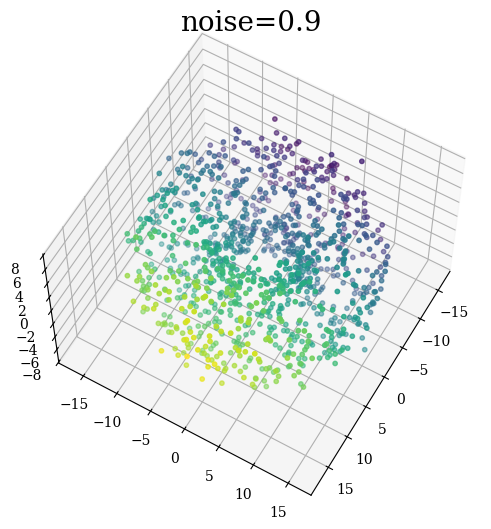

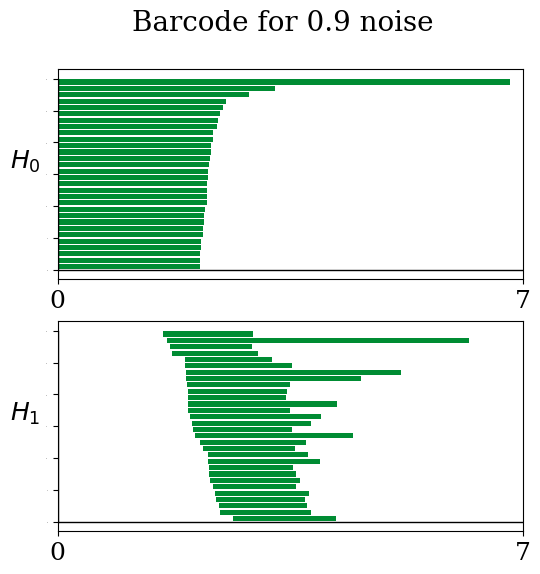

Degree of 110: $\Gamma_1 =0.287$ and $\Gamma_1^{self} =0.287$

Degree of 101: $\Gamma_1 =0.287$ and $\Gamma_1^{self} =0.266$

Degree of 121: $\Gamma_1 =0.42$ and $\Gamma_1^{self} =0.42$

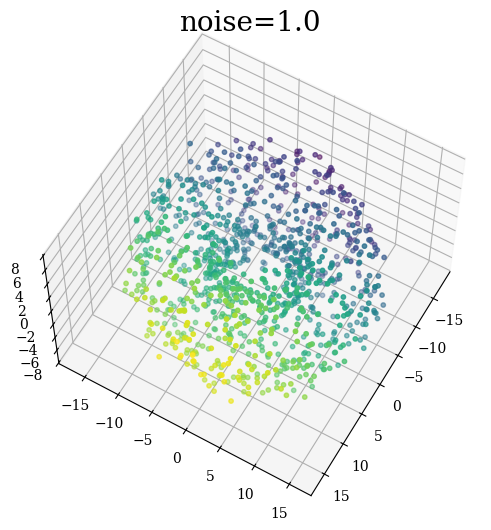

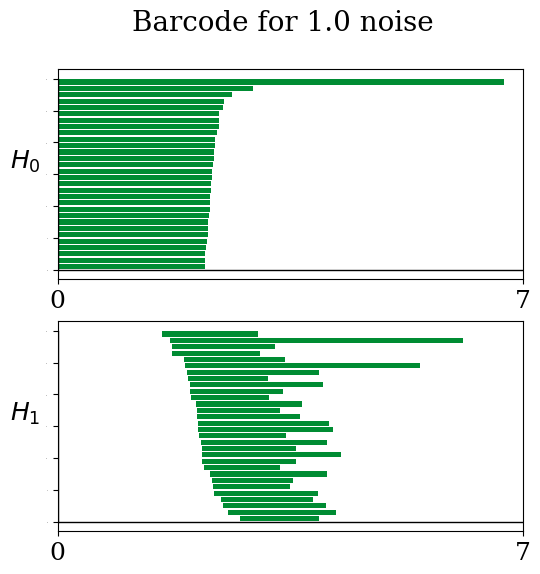

Degree of 110: $\Gamma_1 =0.199$ and $\Gamma_1^{self} =0.199$

Degree of 101: $\Gamma_1 =0.199$ and $\Gamma_1^{self} =0.543$

Degree of 121: $\Gamma_1 =0.526$ and $\Gamma_1^{self} =0.526$

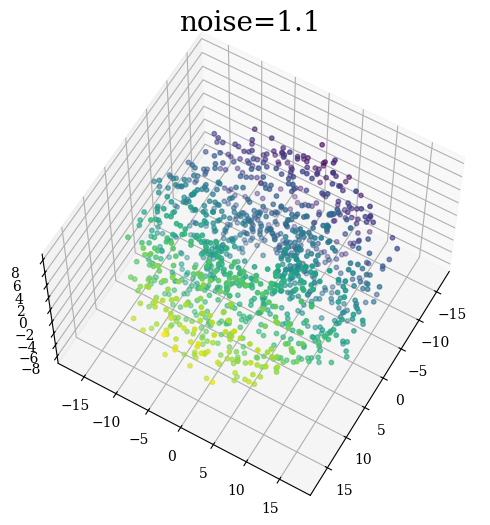

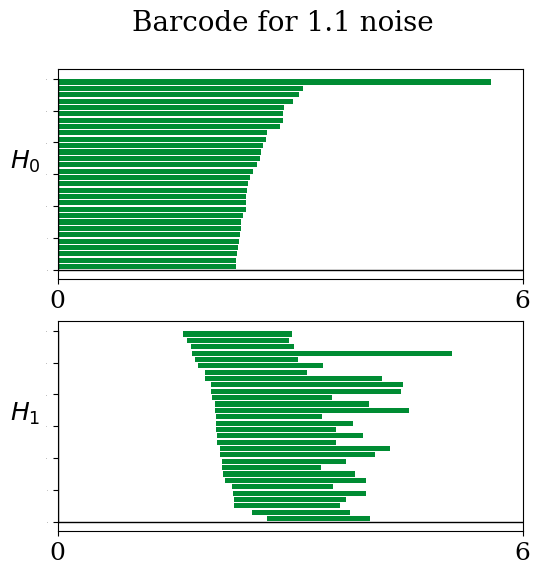

Degree of 110: $\Gamma_1 =0.254$ and $\Gamma_1^{self} =0.254$

Degree of 101: $\Gamma_1 =0.254$ and $\Gamma_1^{self} =0.116$

Degree of 121: $\Gamma_1 =0.254$ and $\Gamma_1^{self} =0.26$

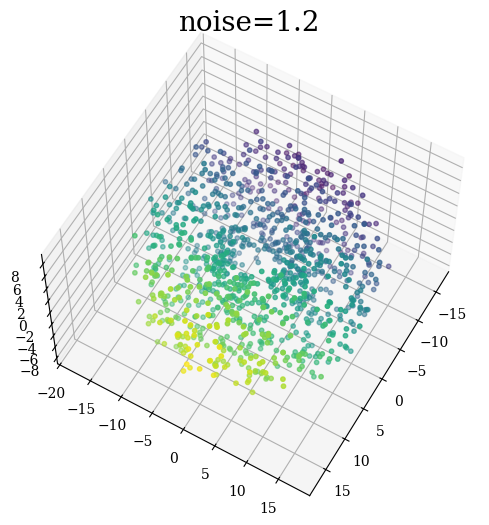

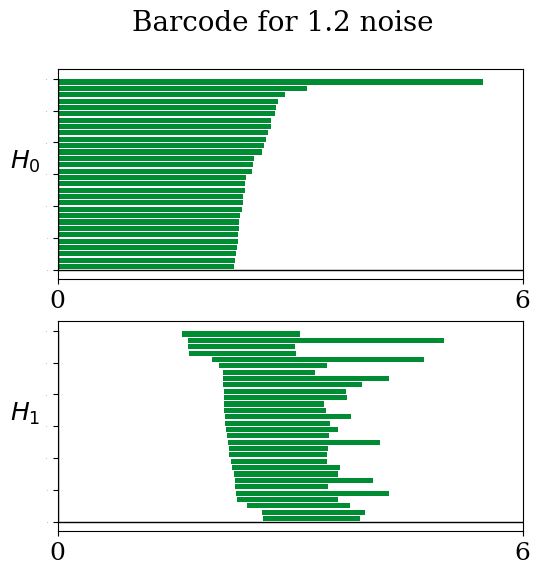

Degree of 110: $\Gamma_1 =0.174$ and $\Gamma_1^{self} =0.174$

Degree of 101: $\Gamma_1 =0.174$ and $\Gamma_1^{self} =0.461$

Degree of 121: $\Gamma_1 =0.209$ and $\Gamma_1^{self} =0.351$

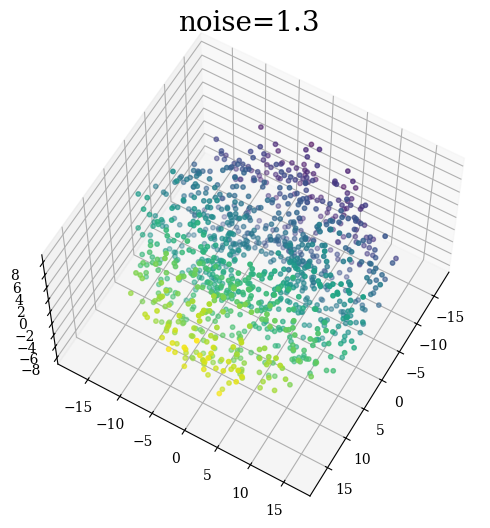

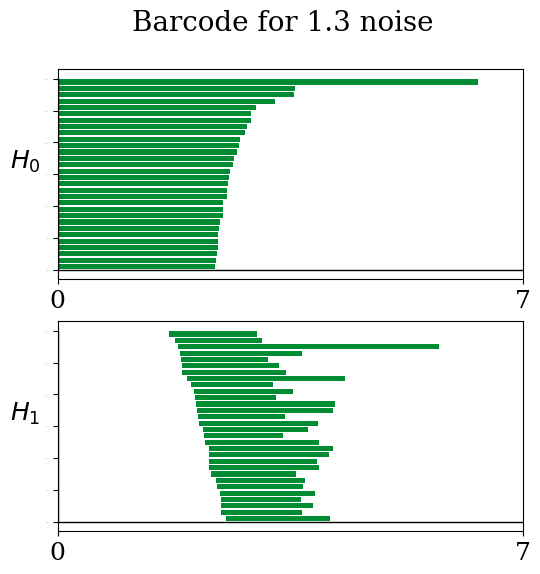

Degree of 110: $\Gamma_1 =0.397$ and $\Gamma_1^{self} =0.397$

Degree of 101: $\Gamma_1 =0.397$ and $\Gamma_1^{self} =0.114$

Degree of 121: $\Gamma_1 =0.42$ and $\Gamma_1^{self} =0.273$

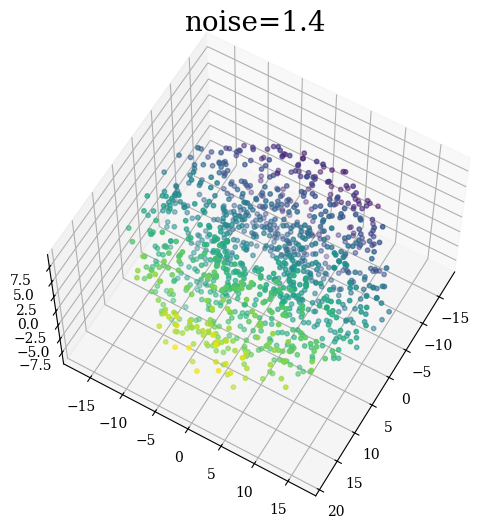

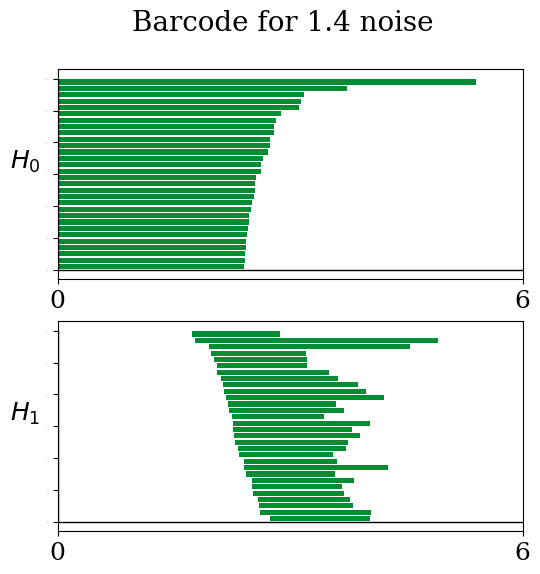

Degree of 110: $\Gamma_1 =0.172$ and $\Gamma_1^{self} =0.172$

Degree of 101: $\Gamma_1 =0.172$ and $\Gamma_1^{self} =0.435$

Degree of 121: $\Gamma_1 =0.172$ and $\Gamma_1^{self} =0.348$

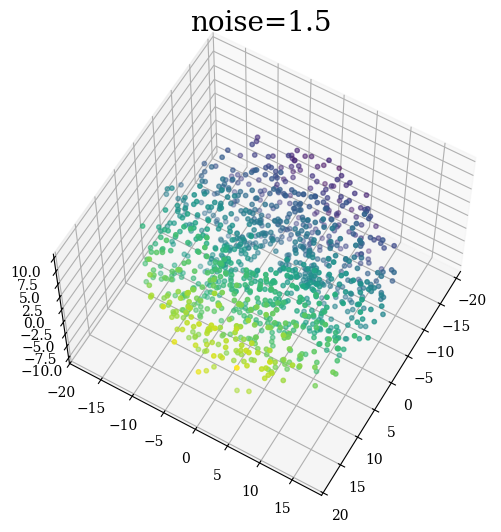

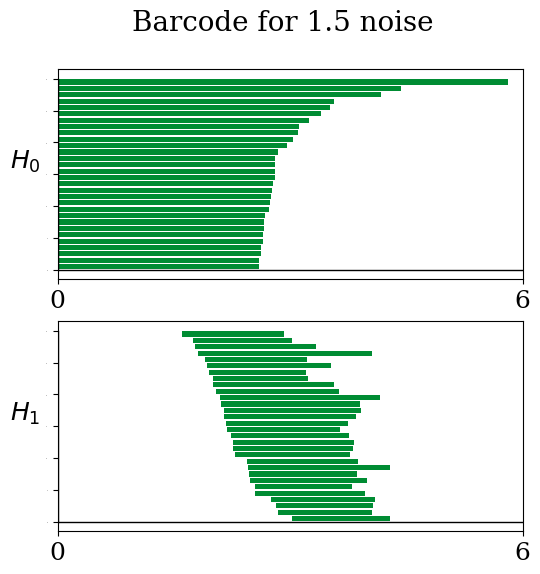

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.078$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.664$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.184$

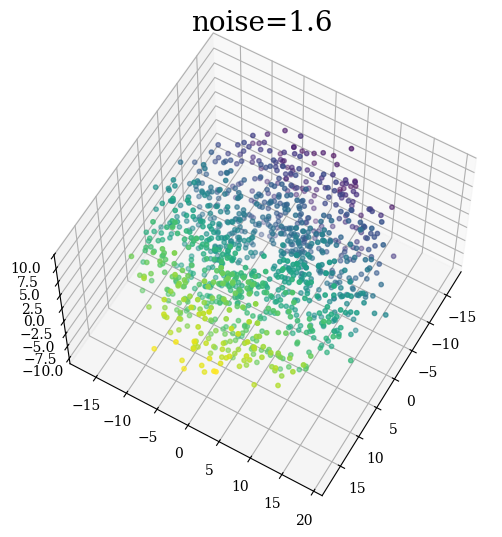

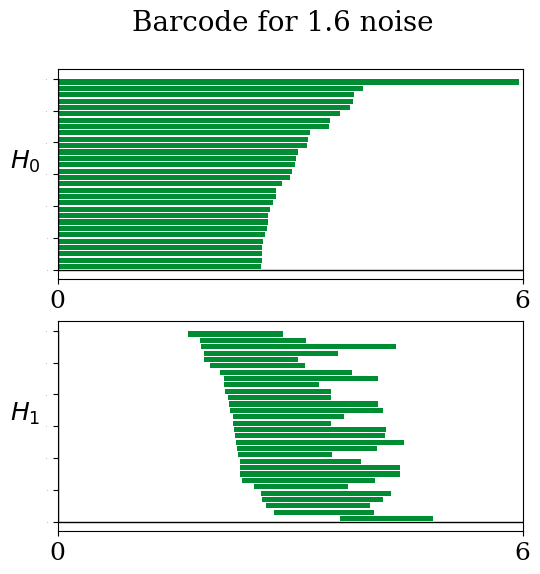

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.137$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.436$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.179$

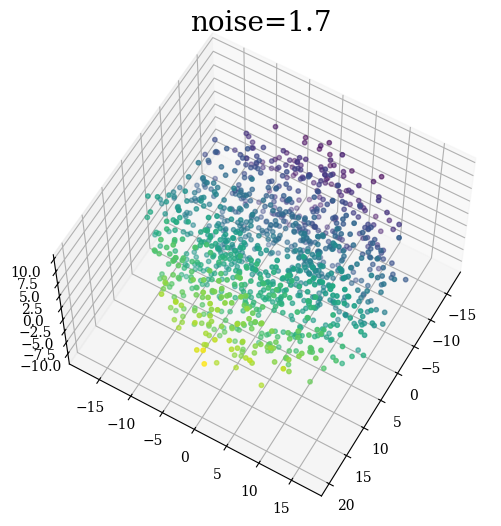

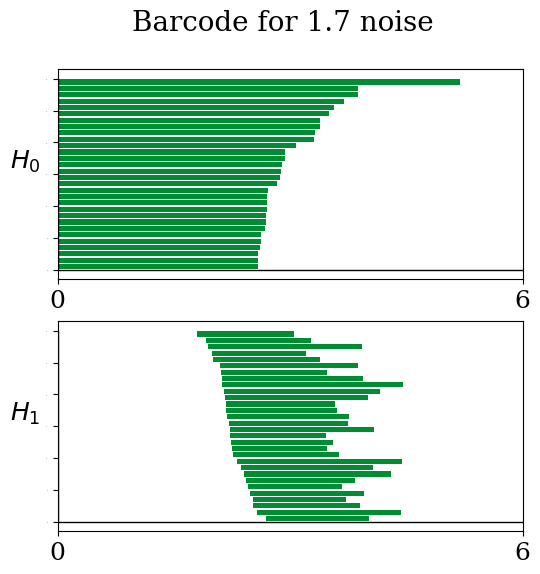

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.084$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.652$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.136$

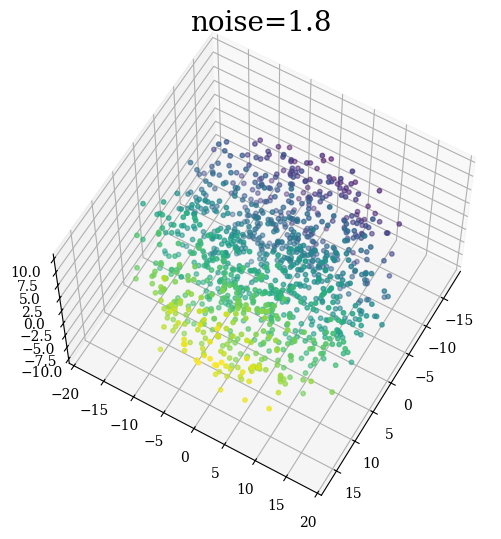

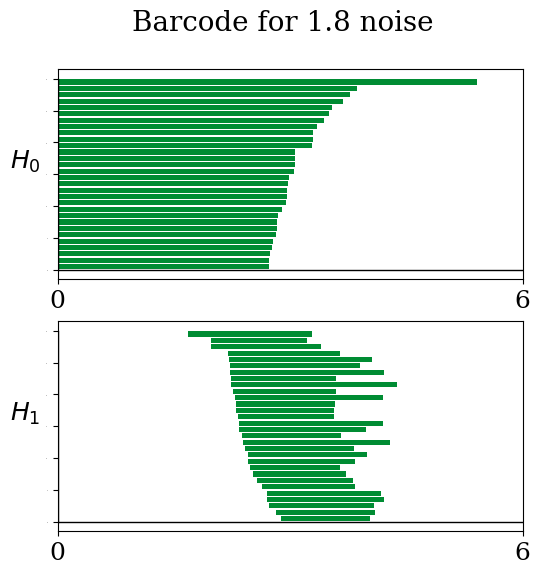

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.074$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.682$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.11$

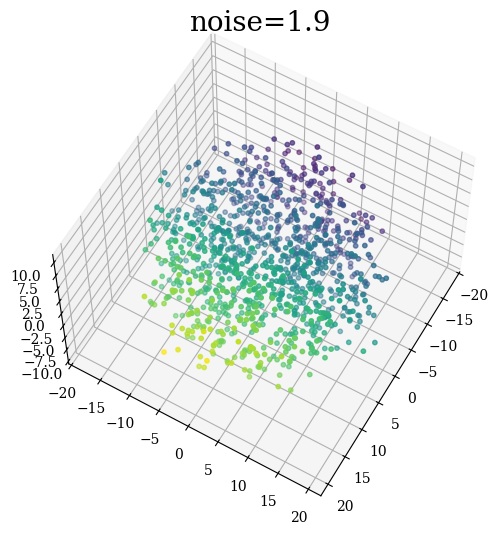

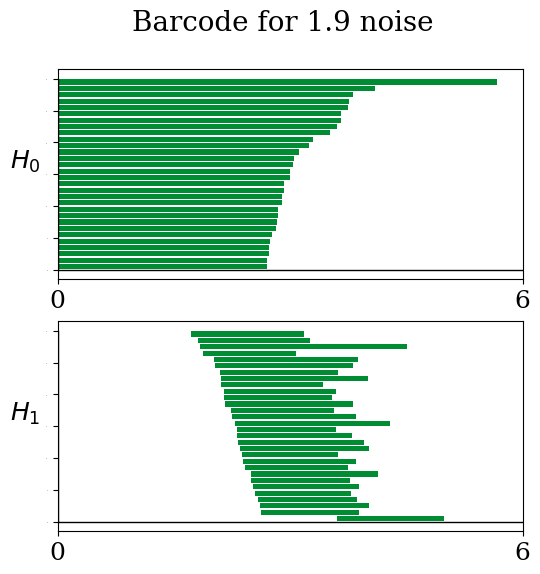

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.249$

Degree of 101: $\Gamma_1 =0.056$ and $\Gamma_1^{self} =0.267$

Degree of 121: $\Gamma_1 =0.04$ and $\Gamma_1^{self} =0.288$

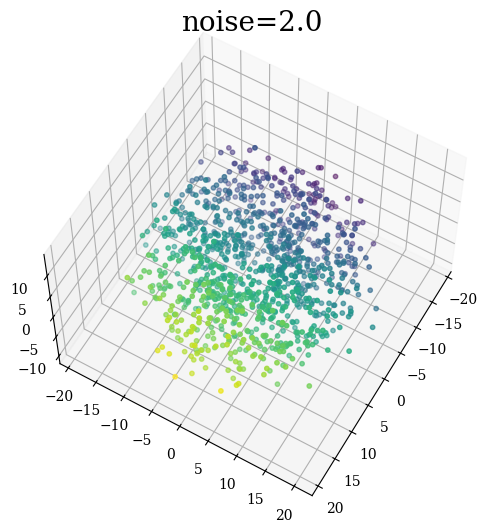

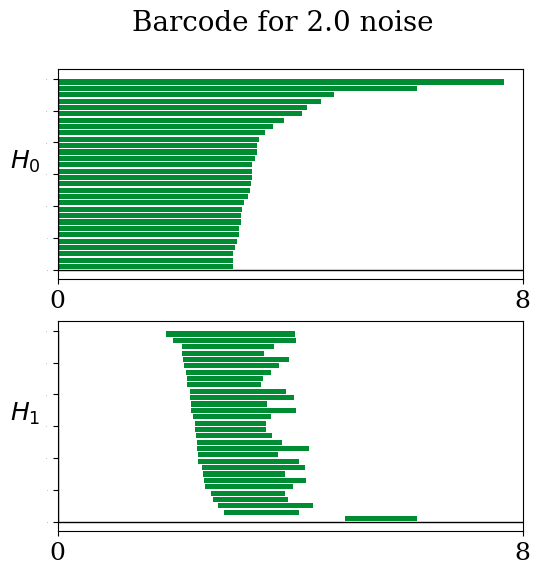

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.042$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.754$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.129$

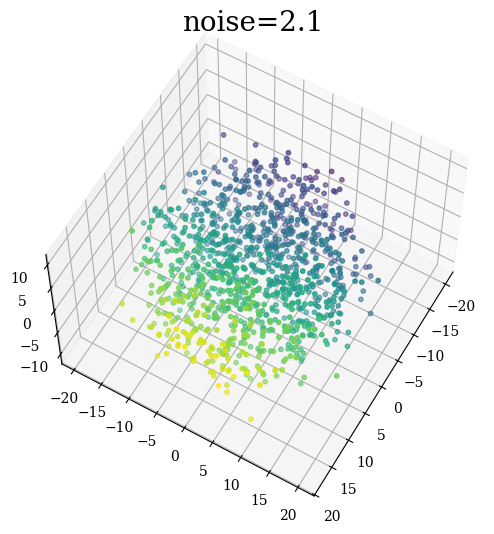

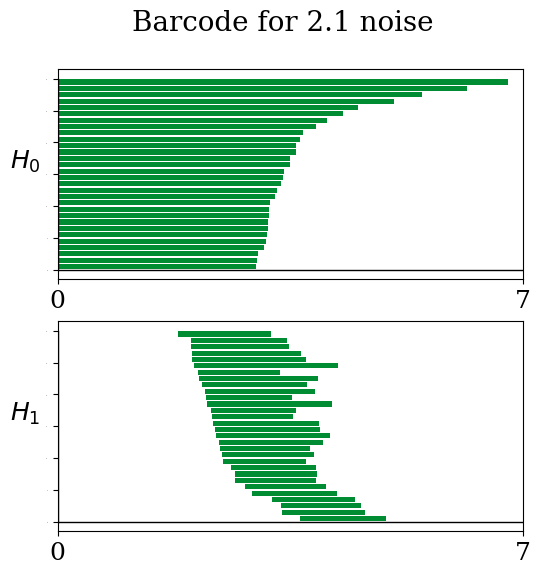

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.132$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.49$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.179$

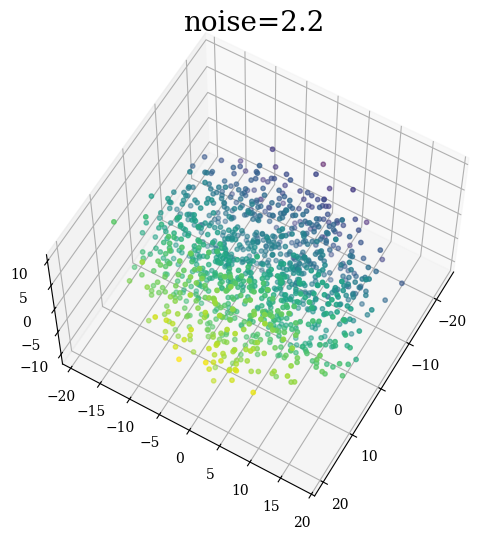

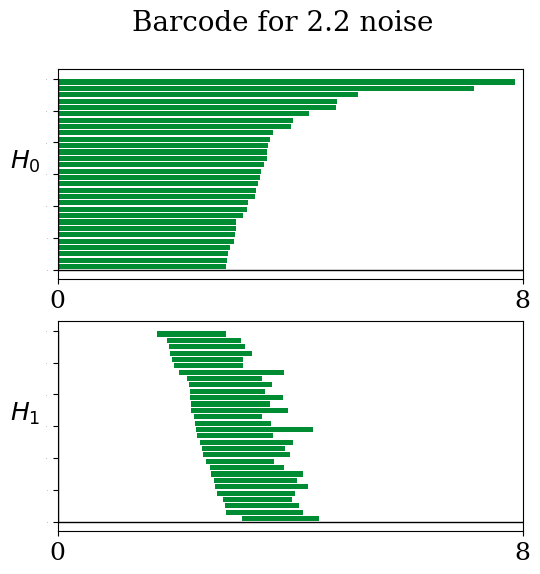

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.106$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.492$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.17$

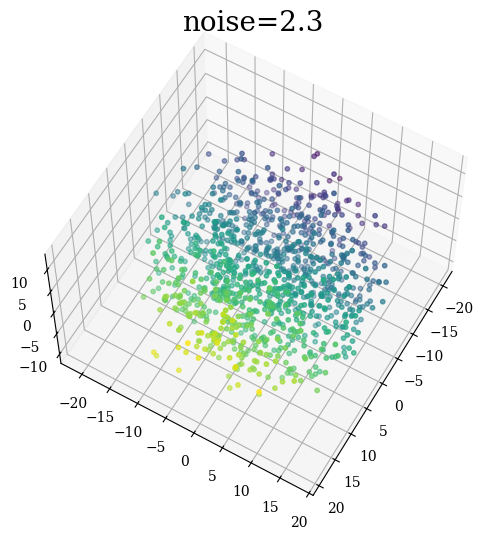

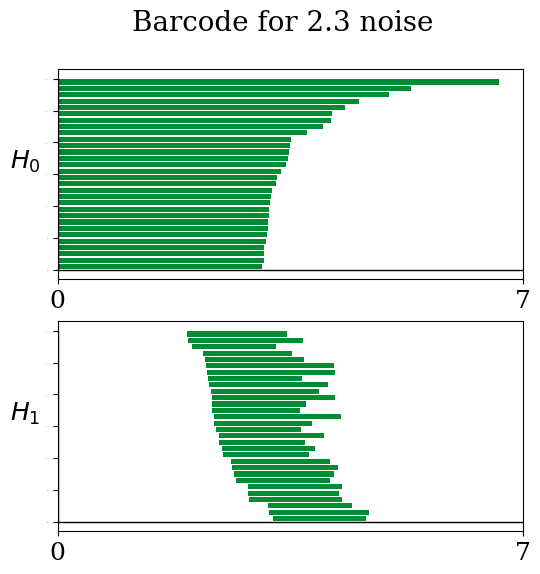

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.001$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.864$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.016$

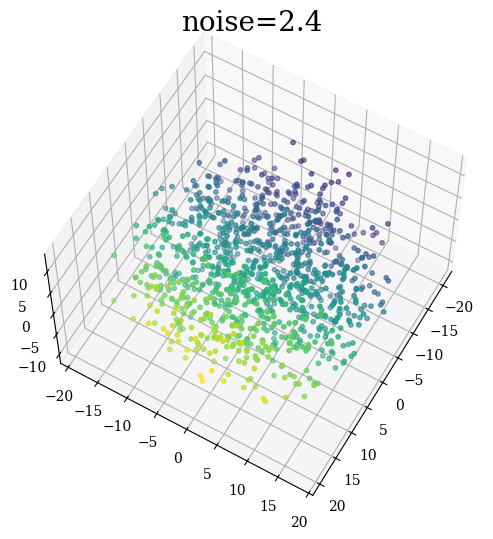

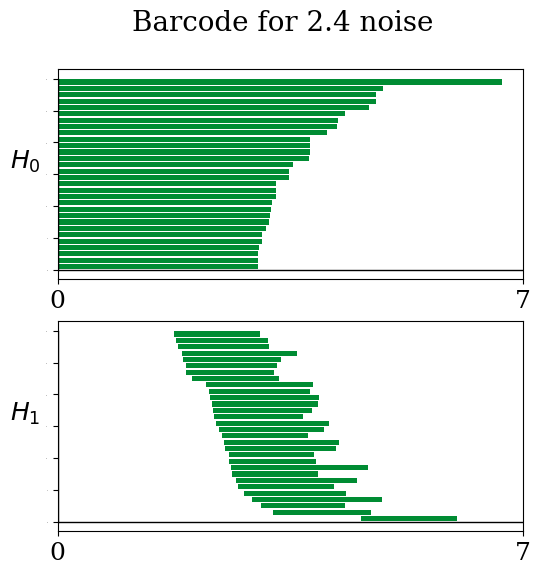

Degree of 110: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.046$

Degree of 101: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.716$

Degree of 121: $\Gamma_1 =0.0$ and $\Gamma_1^{self} =0.113$

In [12]:
if __name__ == '__main__':

    for noise in noises:

        #generate data from a shape with given parameters and noise level
        data_generator = Synthetic_Data(top_data, dim, num_points)
        dataset = data_generator.generate_dataset( r, R, noise, if_plot=True)

        #compute barcode from synthetic dataset
        barcode = Barcode()
        barcode.compute_barcode(dataset, maxdim, if_plot=False)

        #plot barcode
        barcode.plot('Barcode for '+str(np.round(noise, decimals=2))+' noise')
        plt.show()

        #define reference from noiseless dataset
        if noise == noises[0]:
            for bn in betti_ns:
                ref[bn] = barcode.make_idealized(betti_n=bn, strict=True, if_plot=False)

        #compute Gamma with respect to noiseless reference and self reference for each noise level
        for bn in betti_ns:
            Gamma[bn].append(barcode.compute_Gamma(ref=ref[bn], betti_n=bn))
            Gamma_self[bn].append(barcode.compute_Gamma(ref='self', betti_n=bn))

            display(Markdown(r'Degree of '+bn+': $\Gamma_1 ='+str(np.round(Gamma[bn][-1], decimals=3))+r'$ and $\Gamma_1^{self} ='+str(np.round(Gamma_self[bn][-1], decimals=3))+r'$'))

## Plotting $\Gamma_1$ and $\Gamma_1^{self}$ as a function of the level of noise

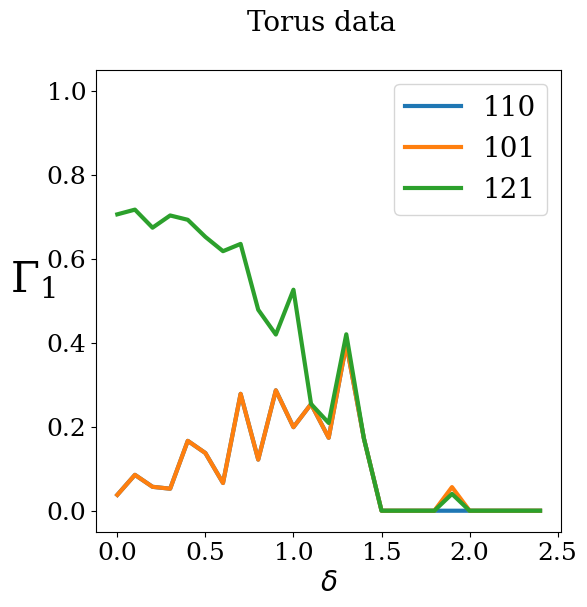

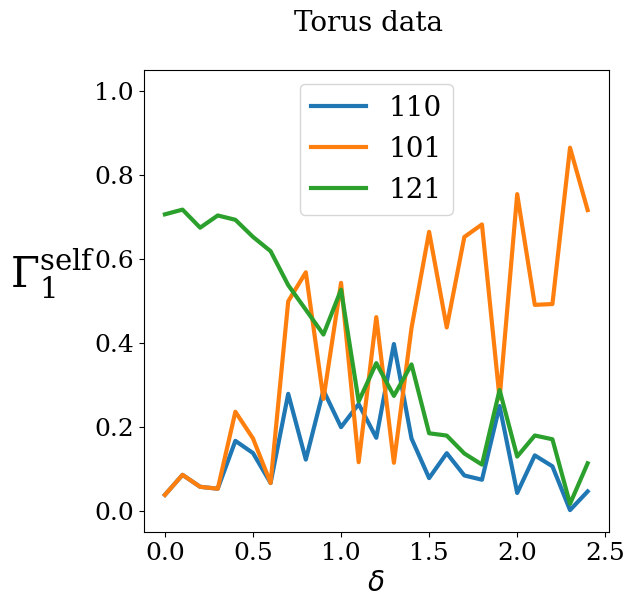

In [13]:
fig=plt.figure(figsize=(6,6))
axis=fig.add_subplot(111)
plt.suptitle(top_data.capitalize()+' data',fontsize=20)
for bn in betti_ns:
    axis.plot(noises, Gamma[bn],lw=3, label=bn )
axis.set_ylabel(r'$\mathdefault{\Gamma_{1}}$',rotation = 0, labelpad =10, fontsize=30)
axis.set_xlabel(r'$\delta$',fontsize=20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.ylim(-0.05,1.05)
plt.legend(fontsize=20)
plt.show()

fig=plt.figure(figsize=(6,6))
axis=fig.add_subplot(111)
plt.suptitle(top_data.capitalize()+' data',fontsize=20)
for bn in betti_ns:
    axis.plot(noises, Gamma_self[bn],lw=3, label=bn )
axis.set_ylabel(r'$\mathdefault{\Gamma^{self}_{1}}$',rotation = 0, labelpad =30, fontsize=30)
axis.set_xlabel(r'$\delta$',fontsize=20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.ylim(-0.05,1.05)
plt.legend(fontsize=20)
plt.show()

Please, cite this work as:\
@article{diSarra2025role,\
    &nbsp;&nbsp;&nbsp; doi = {10.1371/journal.pcbi.1012776},\
    &nbsp;&nbsp;&nbsp; author = {di Sarra, Giovanni; Jha, Siddharth and Roudi, Yasser},\
    &nbsp;&nbsp;&nbsp; journal = {PLOS Computational Biology},\
    &nbsp;&nbsp;&nbsp; publisher = {Public Library of Science},\
    &nbsp;&nbsp;&nbsp; title = {The role of oscillations in grid cells' toroidal topology},\
    &nbsp;&nbsp;&nbsp; year = {2025},\
    &nbsp;&nbsp;&nbsp; month = {01},\
    &nbsp;&nbsp;&nbsp; volume = {21},\
    &nbsp;&nbsp;&nbsp; url = {https://doi.org/10.1371/journal.pcbi.1012776}, \
    &nbsp;&nbsp;&nbsp; pages = {1-32}\
}